In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
#import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [20]:
# Predict the price of a used cardepending on the specificaitons
# Clean
# Assumptions
# log transformation
# Create Model
# Dummies

In [21]:
import os

In [22]:
os.chdir('C:\\Users\\Administrator')

In [23]:
pwd

'C:\\Users\\Administrator'

In [24]:
data = pd.read_csv(r'C:\Users\Administrator\Class Notebooks\Datasets\Linear Regression\carprice.csv')


In [25]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


# Data Preprocessing

In [27]:
# Exploring the descriptive statistics of the features

In [28]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [29]:
# Getting all the features
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [30]:
# Different counts means presence of Nulls or missing vlaues
# Unique - Models = 312 Difficult to implement - Meaning more than 300 dummies
# We will drop Models as not good variable to work with. MOst of the information could be engineered from
# Brand, Year & EnginV hence we will not looose too much variability
# Registrantions - has 3947 yes - almost all of the entries are yes - Hence not so useful variable


In [31]:
# Determining variables of interest

data = data.drop(['Model'], axis=1)

In [32]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [33]:
data['Brand'].value_counts()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: Brand, dtype: int64

In [34]:
data['Body'].value_counts()

sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: Body, dtype: int64

In [35]:
data['Engine Type'].value_counts()

Diesel    2019
Petrol    1559
Gas        613
Other      154
Name: Engine Type, dtype: int64

In [36]:
xi = data.groupby('Brand')

In [37]:
xi['Body'].value_counts()

Brand       Body     
Audi        sedan        217
            vagon        108
            crossover     77
            other         35
            hatch         19
                        ... 
Volkswagen  sedan        269
            hatch        112
            other         99
            vagon         97
            crossover     86
Name: Body, Length: 41, dtype: int64

In [38]:
# xi.get_group('BMW')

In [39]:
# for Brand, Group in xi:
#    print(Brand)
#    print(Group)

In [40]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [41]:
# If you are removing less than 5% of the observations
# You should remove all that has missing values

In [42]:
data_no_mv = data.dropna(axis = 0)

In [43]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [44]:
data_no_mv.describe(include = 'all')
# Now we don't have missing values

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


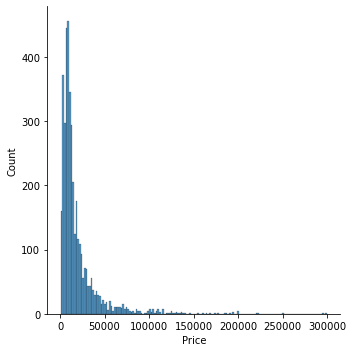

In [45]:
sns.displot(data_no_mv['Price'])
# For better result we would be looking for a normal distributions
# Here we have exponential distribution
# As its has very long tail looks like it has outliers

In [46]:
# One way to deal with outliers is remove the top 1% of observations


In [47]:
# Can be easily done use a quatile method
# datafra.quatile() returns the value at give quantile(= np.percentile)

In [48]:
# Want to get 99th percentile & keep the data below it

In [49]:
q = data_no_mv['Price'].quantile(0.99)

In [50]:
q

129812.51999999981

In [51]:
data_u = data_no_mv[data_no_mv['Price']<q]

In [52]:
data_u.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


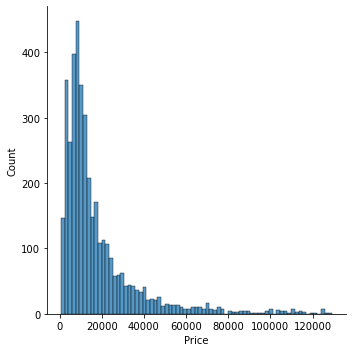

In [53]:
sns.displot(data_u['Price'])
# Now we have same shape or distribution now but less extreme values

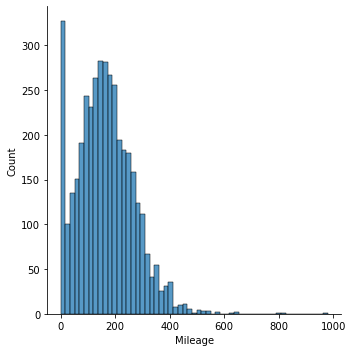

In [54]:
sns.displot(data_u['Mileage'])

In [55]:
# Same issue wit the milage
q = data_no_mv['Mileage'].quantile(0.99)
data_u2 = data_no_mv[data_no_mv['Mileage']<q]

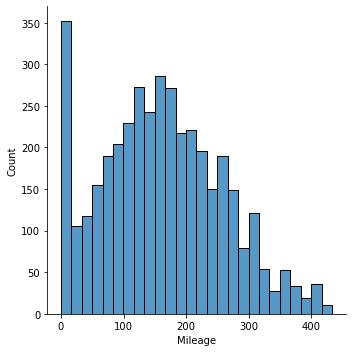

In [56]:
sns.displot(data_u2['Mileage'])

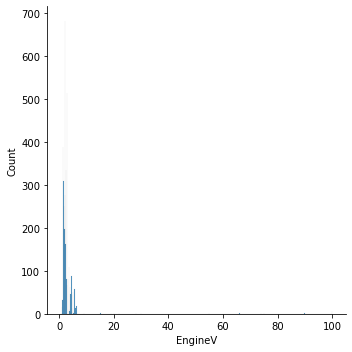

In [57]:
sns.displot(data_u2['EngineV'])
# Enginve values are wrong not just extreme # 
# It has many 99 values. Looks like mssing value is replaced by 99
# Just by googling we can find that engine volume should normally fall in 0.6 & 6.5

In [58]:
data_u3 = data_u2[data_u2['EngineV']<6.5]

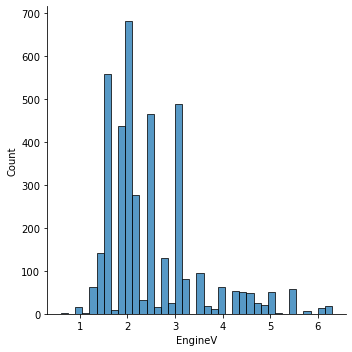

In [59]:
sns.displot(data_u3['EngineV'])

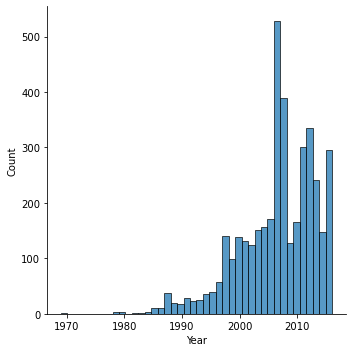

In [60]:
sns.displot(data_u3['Year'])
# We ahve the problem at teh low end. Most of the cars are new but some are vintage cars


In [61]:
#

In [62]:
q = data_u3['Year'].quantile(0.01)
data_u4 = data_u3[data_u3['Year']>q]

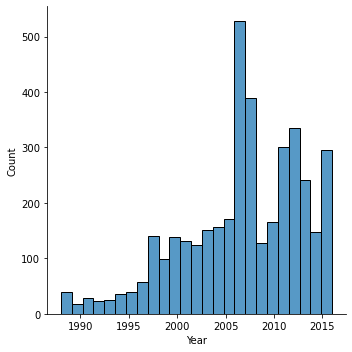

In [63]:
sns.displot(data_u4['Year'])

In [64]:
data_u4.head(20)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011


In [65]:
data_u4.tail(20)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
4322,Toyota,100000.0,crossover,0,4.5,Diesel,yes,2016
4323,Renault,8999.0,other,126,2.0,Diesel,yes,2012
4324,Mercedes-Benz,16800.0,sedan,125,1.8,Petrol,yes,2008
4325,Mercedes-Benz,8200.0,sedan,280,2.4,Gas,yes,1997
4326,Mercedes-Benz,24950.0,other,60,1.8,Petrol,yes,2013
4327,Audi,80999.0,crossover,0,3.0,Diesel,yes,2016
4328,Mercedes-Benz,7300.0,van,207,2.2,Diesel,yes,2003
4330,BMW,21335.0,other,105,3.0,Petrol,yes,2008
4331,BMW,45000.0,crossover,80,3.0,Petrol,yes,2011
4332,Renault,6750.0,van,155,1.5,Diesel,yes,2012


In [66]:
data_cleaned = data_u4.reset_index(drop= True)

In [67]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3907,3907.000000,3907,3907.000000,3907.000000,3907,3907,3907.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1472,NaN,NaN,1815,3545,NaN
mean,NaN,19960.692119,NaN,158.929358,2.474771,NaN,NaN,2006.798055
std,NaN,26048.838086,NaN,96.242696,0.978819,NaN,NaN,6.127291
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7274.500000,NaN,89.500000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Assumptions

In [68]:
# Checking for Linearity

Text(0.5, 1.0, 'Price & Mileage')

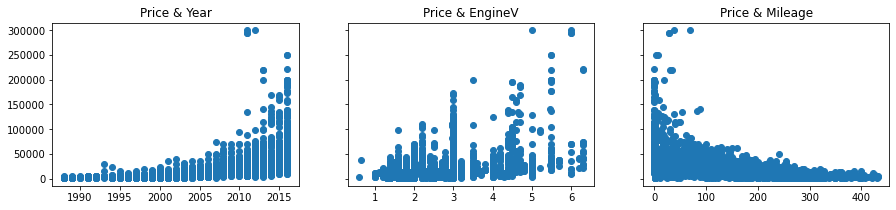

In [69]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price & Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price & EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price & Mileage')

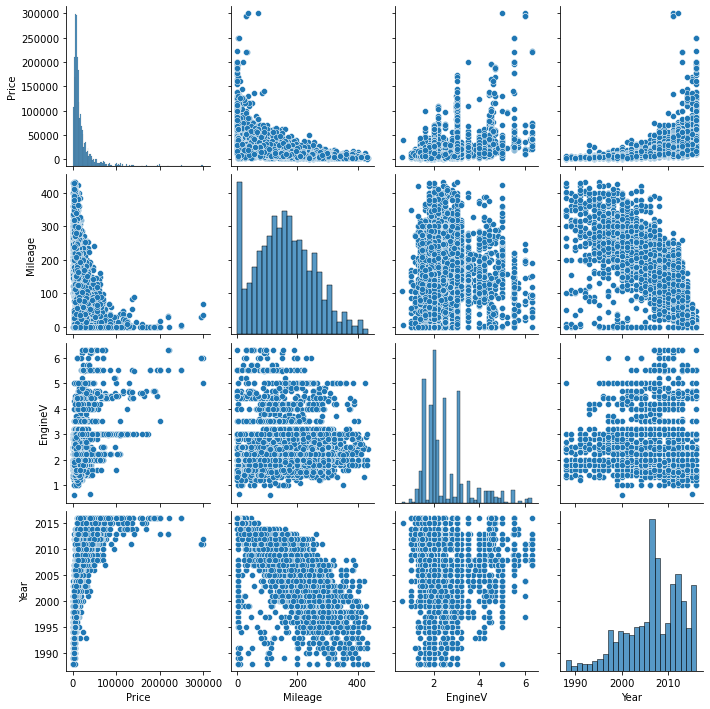

In [70]:
sns.pairplot(data_cleaned)

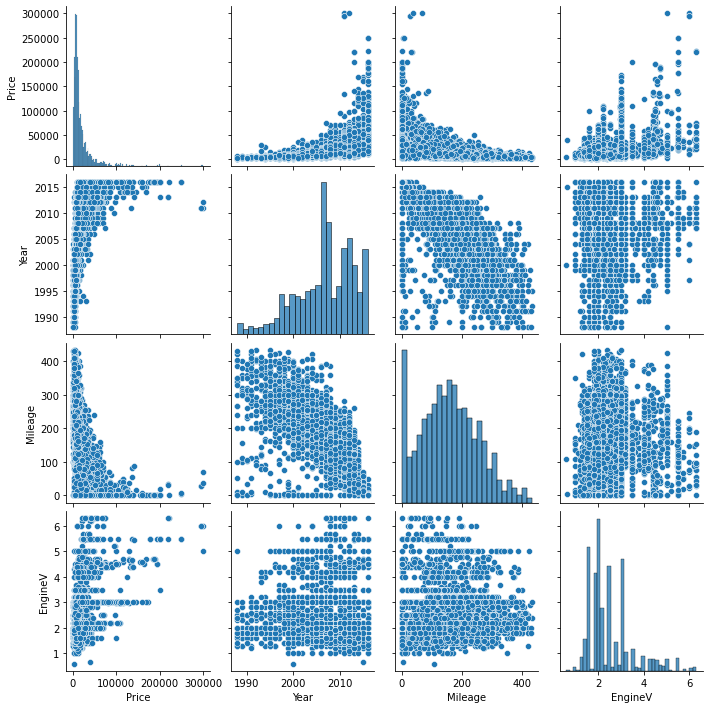

In [71]:
sns.pairplot(data = data_cleaned, vars=['Price','Year','Mileage','EngineV'])

In [72]:
# We see patterns but none are linear

In [73]:
# Hence we need to transform one or more variables

In [74]:
# Log transformation are very useful when facing exponential relationships

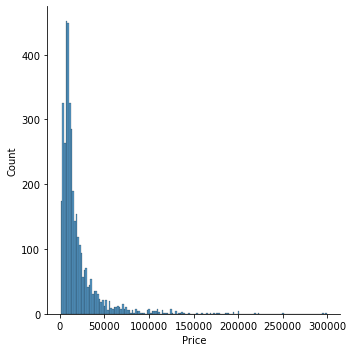

In [75]:
sns.displot(data_cleaned['Price'])
# Price is exponentially distributed
# Can need to take a log transformation

In [76]:
data_cleaned['Price']

0         4200.0
1         7900.0
2        13300.0
3        23000.0
4        18300.0
          ...   
3902     11500.0
3903     17900.0
3904    125000.0
3905      6500.0
3906     13500.0
Name: Price, Length: 3907, dtype: float64

In [77]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3902,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3903,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3904,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3905,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'Log Price & Mileage')

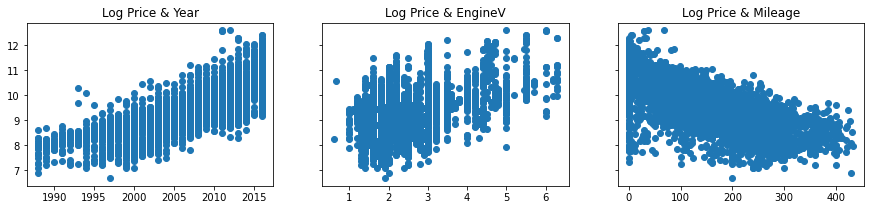

In [78]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price & Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price & EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price & Mileage')

In [79]:
# Now we see linear pattern on all the plots now

In [80]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [81]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3902,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3903,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3904,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3905,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [82]:
# No Endogenty - No relation in errors & independent variables 
# Will chekc after regression model is created

In [83]:
# Normality & Homoscdasticity
# Normality is assumed as we ahve big sample size following the central limit theorem
# Zero mean of distributions of error - Have taken care by including the intercept in the regression 
# Homoscdasticity - log transformation is the most common fit for homoscdasticity

In [84]:
# No Autocorrelation - As data is not coming from time series data or panel data. 

# Multicollinearity 

In [85]:
# logically Year & Mileage will be correlated 
# Newer the car lower the mileage. So we should expect some colliearity in the data


In [86]:
# Best way to chekc for multi collinearity is using VIF
# vif - variance inflation factor
# VIF is a measure that estimates how larger would the square root of standard error the estimate is compared to the 
# situation where the variable is completely uncorrelated with other predictors

# the most widely-used diagnostic for multicollinearity, the variance inflation factor (VIF). 
# The VIF may be calculated for each predictor by doing a linear regression of that predictor 
# on all the other predictors, and then obtaining the R2 from that regression. The VIF is just 1/(1-R2).

# It’s called the variance inflation factor because it estimates how much the variance of a coefficient is
# “inflated” because of linear dependence with other predictors. Thus, a VIF of 1.8 tells us that the 
# variance (the square of the standard error) of a particular coefficient is 80% larger than it would be
# if that predictor was completely uncorrelated with all the other predictors.


# https://en.wikipedia.org/wiki/Variance_inflation_factor
# https://statisticalhorizons.com/multicollinearity

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For which all variables we wna tto check for multicollinearity
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features']= variables.columns

In [88]:
variables.shape[1]

3

In [89]:
variance_inflation_factor(variables.values, 0)

3.7032655679635607

In [90]:
variance_inflation_factor(variables.values, 1)

10.323287188000672

In [91]:
variance_inflation_factor(variables.values, 2)

7.400347557824418

In [92]:
vif
# VIF - (1, inf)
# If we have vif = 1 then it means no multicollinearity
# 1 < VIF < 5: Perfectly Okay
# VIF year if highly collinear so will remove it

,VIF,features
0,3.703266,Mileage
1,10.323287,Year
2,7.400348,EngineV


In [93]:
data_no_mc = data_cleaned.drop(['Year'], axis = 1)

In [94]:
data_no_mc

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3902,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3903,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3904,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3905,BMW,sedan,1,3.5,Petrol,yes,8.779557


# Create Dummies

In [95]:
data_dummy = pd.get_dummies(data_no_mc,drop_first = True)

In [96]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mileage              3907 non-null   int64  
 1   EngineV              3907 non-null   float64
 2   log_price            3907 non-null   float64
 3   Brand_BMW            3907 non-null   uint8  
 4   Brand_Mercedes-Benz  3907 non-null   uint8  
 5   Brand_Mitsubishi     3907 non-null   uint8  
 6   Brand_Renault        3907 non-null   uint8  
 7   Brand_Toyota         3907 non-null   uint8  
 8   Brand_Volkswagen     3907 non-null   uint8  
 9   Body_hatch           3907 non-null   uint8  
 10  Body_other           3907 non-null   uint8  
 11  Body_sedan           3907 non-null   uint8  
 12  Body_vagon           3907 non-null   uint8  
 13  Body_van             3907 non-null   uint8  
 14  Engine Type_Gas      3907 non-null   uint8  
 15  Engine Type_Other    3907 non-null   u

In [97]:
data_dummy.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [98]:
data_dummy.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [99]:
# Getting log_price at teh start of the dataset
cols = [ 'log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [100]:
data_preprocessed = data_dummy[cols]

In [101]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Building Model


In [102]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis = 1)

# Scaling Data

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [104]:
input_scaled = scaler.transform(inputs)

In [105]:
# It is not recommended to standardise dummy variables
# Scaling has no effect on predictive power on dummies
# Once scaled though they lose all their dummy meaning

# Train & Test Split

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size = 0.2, random_state = 0)

# Building the model

In [108]:
lm = LinearRegression()
lm.fit(x_train, y_train)


LinearRegression()

In [109]:
y_hat = lm.predict(x_train)

In [110]:
exp_train_pred = (np.exp(y_hat)) 
exp_train_act = (np.exp(y_train.reset_index(drop = True)))


Text(0, 0.5, 'Predictions(y_hat)')

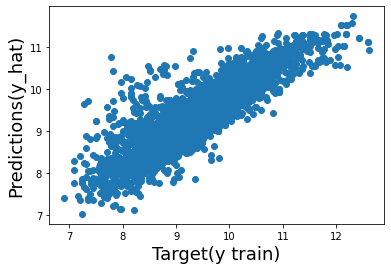

In [111]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target(y train)',size = 18)
plt.ylabel('Predictions(y_hat)',size = 18)
# Our targets & Predictions are linear so our model is performing quite well

In [112]:
# Residual Plot - Difference between targets & predictions
# As per normaliity & homoscdasticity 
# Our errors are normally distributed
# Mean is zero as ell

<AxesSubplot:xlabel='log_price', ylabel='Count'>

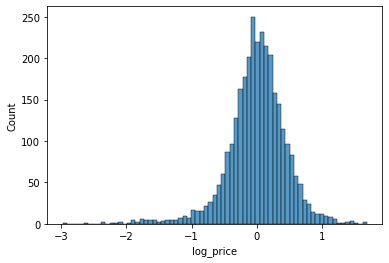

In [113]:
sns.histplot(y_train-y_hat)

In [114]:
# Calculating the R squared 
lm.score(x_train,y_train)
# Our model is explaining 75% of the variability of the data

0.7533880821815966

In [115]:
reg_summary = pd.DataFrame(data = inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = lm.coef_
reg_summary
# Few weights are positive and few are -gative that means directly proportional and inversally proportions
# Higher the Engine volumn higher the price 
# Higher the mileage lower the price 

,Features,Weights
0,Mileage,-0.479071
1,EngineV,0.255383
2,Brand_BMW,0.024262
3,Brand_Mercedes-Benz,0.041260
4,Brand_Mitsubishi,-0.129887
5,Brand_Renault,-0.170025
6,Brand_Toyota,-0.049876
7,Brand_Volkswagen,-0.068257
8,Body_hatch,-0.133580
9,Body_other,-0.086491


In [116]:
data_cleaned['Brand'].unique()
# Missing is Audi that means when all other brands are zero
# then its the data for audi as audi is 1 then 
# Hence our benchmark is Audi
# A positive weight  shows that the respective category (Brand) is more expensive than the benchmark Audi
# A negative weight  shows that the respective category (Brand) is less expensive than the benchmark Audi
# If the car is BMW then it would be costly then compared to if teh car is Mitsubishi

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [117]:
data_cleaned['Brand'].value_counts()

Volkswagen       848
Mercedes-Benz    788
BMW              627
Toyota           502
Renault          432
Audi             408
Mitsubishi       302
Name: Brand, dtype: int64

In [118]:
# If we wnat to find out the significance of variables then take the absolute values of the weights of the variables 
# to compare.
# Bigger the weight bigger the impact on the target variables

# Mileage	-0.479071
# EngineV	0.255383
# Mileage is more prominent feature compared to engine volumn
# Dummies variables can't be compared with other variables with continuous values
# Dummies should be compared with its bencmark dummmy. Brands with Audi

In [119]:
# Testing Our Model

In [120]:
y_hat_test = lm.predict(x_test)

(6.0, 13.0)

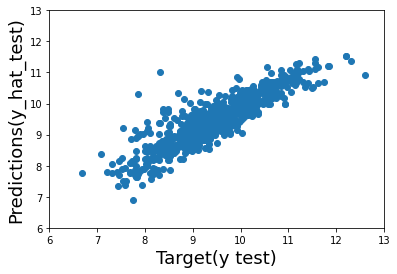

In [121]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Target(y test)',size = 18)
plt.ylabel('Predictions(y_hat_test)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)

In [122]:
# Our model is very good at predicting higher prices . values are closely packed. as values are almost on 45 degree line. 
# but not so good at predicting values at lower price as values are scattered

(6.0, 13.0)

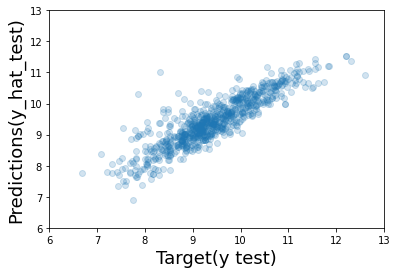

In [123]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Target(y test)',size = 18)
plt.ylabel('Predictions(y_hat_test)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)

In [124]:
df_prf = pd.DataFrame(y_hat_test, columns=['Predictions'])

In [125]:
df_prf.head()

,Predictions
0,9.978647
1,10.163998
2,9.275872
3,8.217363
4,10.743315


In [126]:
# Getting the actual values not the log values.
# So we have to take opposite of log that is exponential 
df_prf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_prf.head()

,Predictions
0,21561.112944
1,25951.856538
2,10677.262924
3,3704.719377
4,46319.347790


In [127]:
df_prf['Target'] = np.exp(y_test)

In [128]:
df_prf
# Lot of nulls as we have lot of indexes after the split into test. Original indexes were preserved

,Predictions,Target
0,21561.112944,NaN
1,25951.856538,7900.0
2,10677.262924,NaN
3,3704.719377,NaN
4,46319.347790,18300.0
...,...,...
777,12696.234795,NaN
778,15971.458378,NaN
779,6615.644733,6950.0
780,15479.177389,NaN


In [129]:
y_test

3391     9.296518
2067     9.947504
2890     9.407468
2004     8.070906
2306    10.857074
          ...    
3126     9.985068
1571     9.472628
1098     8.779557
519      9.795345
3858    10.021271
Name: log_price, Length: 782, dtype: float64

In [130]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     9.296518
1     9.947504
2     9.407468
3     8.070906
4    10.857074
Name: log_price, dtype: float64

In [131]:
df_prf['Target'] = np.exp(y_test)

In [132]:
df_prf

,Predictions,Target
0,21561.112944,10900.0
1,25951.856538,20900.0
2,10677.262924,12179.0
3,3704.719377,3200.0
4,46319.347790,51900.0
...,...,...
777,12696.234795,21700.0
778,15971.458378,12999.0
779,6615.644733,6500.0
780,15479.177389,17950.0


In [133]:
df_prf['Residual'] = df_prf['Target'] - df_prf['Predictions']

In [134]:
df_prf

,Predictions,Target,Residual
0,21561.112944,10900.0,-10661.112944
1,25951.856538,20900.0,-5051.856538
2,10677.262924,12179.0,1501.737076
3,3704.719377,3200.0,-504.719377
4,46319.347790,51900.0,5580.652210
...,...,...,...
777,12696.234795,21700.0,9003.765205
778,15971.458378,12999.0,-2972.458378
779,6615.644733,6500.0,-115.644733
780,15479.177389,17950.0,2470.822611


In [135]:
df_prf['Difference_%'] = df_prf['Residual']/df_prf['Target']*100

In [136]:
df_prf

,Predictions,Target,Residual,Difference_%
0,21561.112944,10900.0,-10661.112944,-97.808376
1,25951.856538,20900.0,-5051.856538,-24.171562
2,10677.262924,12179.0,1501.737076,12.330545
3,3704.719377,3200.0,-504.719377,-15.772481
4,46319.347790,51900.0,5580.652210,10.752702
...,...,...,...,...
777,12696.234795,21700.0,9003.765205,41.492006
778,15971.458378,12999.0,-2972.458378,-22.866823
779,6615.644733,6500.0,-115.644733,-1.779150
780,15479.177389,17950.0,2470.822611,13.765028


In [137]:
df_prf['Difference_%'] = np.absolute(df_prf['Residual']/df_prf['Target']*100)

In [138]:
df_prf

,Predictions,Target,Residual,Difference_%
0,21561.112944,10900.0,-10661.112944,97.808376
1,25951.856538,20900.0,-5051.856538,24.171562
2,10677.262924,12179.0,1501.737076,12.330545
3,3704.719377,3200.0,-504.719377,15.772481
4,46319.347790,51900.0,5580.652210,10.752702
...,...,...,...,...
777,12696.234795,21700.0,9003.765205,41.492006
778,15971.458378,12999.0,-2972.458378,22.866823
779,6615.644733,6500.0,-115.644733,1.779150
780,15479.177389,17950.0,2470.822611,13.765028


In [139]:
df_prf.describe()

,Predictions,Target,Residual,Difference_%
count,782.000000,782.000000,782.000000,782.000000
mean,17129.471652,19182.646522,2053.174870,37.509721
std,14968.163977,24510.153196,14832.784821,75.751183
min,975.317590,800.000000,-55785.207043,0.054017
25%,7594.335443,6900.000000,-2206.813690,10.580703
50%,11962.756287,11300.000000,105.790424,23.465280
75%,22067.331486,22000.000000,3186.079097,39.068218
max,101422.384667,300000.000000,244702.228222,1360.614806


In [140]:
df_prf.sort_values(by = ['Difference_%'])

,Predictions,Target,Residual,Difference_%
465,34018.365848,34000.0,-18.365848,0.054017
508,12892.520992,12900.0,7.479008,0.057977
98,19517.741667,19500.0,-17.741667,0.090983
630,10490.136168,10500.0,9.863832,0.093941
163,9713.604318,9700.0,-13.604318,0.140251
...,...,...,...,...
128,18293.908347,4350.0,-13943.908347,320.549617
226,9900.384994,1900.0,-8000.384994,421.072894
504,31260.417244,5900.0,-25360.417244,429.837580
672,29535.705816,2600.0,-26935.705816,1035.988685


In [141]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_prf.sort_values(by = ['Difference_%'])

,Predictions,Target,Residual,Difference_%
465,34018.37,34000.00,-18.37,0.05
508,12892.52,12900.00,7.48,0.06
98,19517.74,19500.00,-17.74,0.09
630,10490.14,10500.00,9.86,0.09
163,9713.60,9700.00,-13.60,0.14
752,3690.76,3700.00,9.24,0.25
362,4487.11,4500.00,12.89,0.29
335,32299.42,32400.00,100.58,0.31
743,10233.00,10200.00,-33.00,0.32
153,12699.72,12750.00,50.28,0.39


In [142]:
from sklearn.metrics import mean_squared_error

In [143]:
# MSE = mean_squared_error(y_actual, y_predicted)
MSE = mean_squared_error(df_prf['Target'], df_prf['Predictions'])
MSE

223945687.9555254

In [144]:
RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
# Usually, a RMSE score of less than 180 is considered a good score for a moderately or well working algorithm.
# In case, the RMSE value exceeds 180, we need to perform feature selection and hyper parameter tuning on the 
# parameters of the model.

Root Mean Square Error:

14964.814999041097


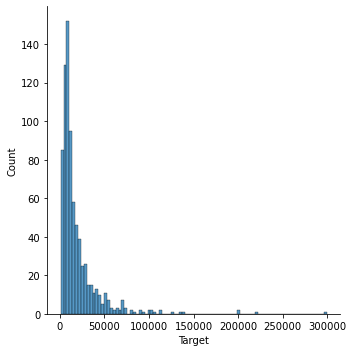

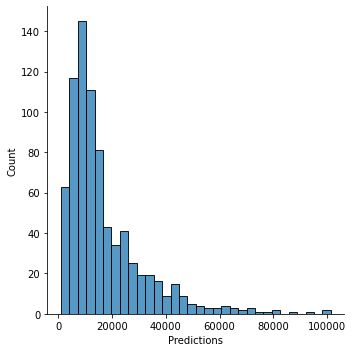

In [145]:
sns.displot(df_prf['Target'])
sns.displot(df_prf['Predictions'])

<AxesSubplot:xlabel='Target', ylabel='Density'>

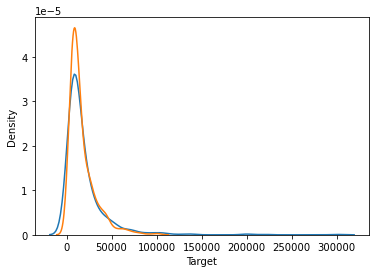

In [146]:
sns.kdeplot(df_prf['Target'])
sns.kdeplot(df_prf['Predictions'])

<AxesSubplot:xlabel='log_price', ylabel='Density'>

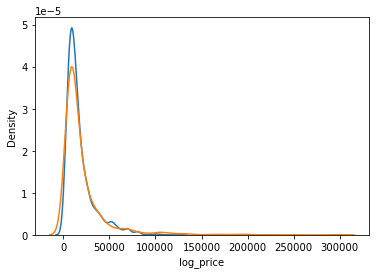

In [147]:
exp_train_pred
sns.kdeplot(exp_train_pred)
sns.kdeplot(exp_train_act)

In [160]:
#for idx, col_name in enumerate(x_train.columns):
#    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

In [ ]:
#checking the magnitude of coefficients
from pandas import Series, DataFrame
predictors = X_train.columns
 
coef = Series(regression_model.coef_.flatten(), predictors).sort_values()
plt.figure(figsize=(10,8))
 
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Mileage'),
  Text(1, 0, 'EngineV'),
  Text(2, 0, 'Brand_BMW'),
  Text(3, 0, 'Brand_Mercedes-Benz'),
  Text(4, 0, 'Brand_Mitsubishi'),
  Text(5, 0, 'Brand_Renault'),
  Text(6, 0, 'Brand_Toyota'),
  Text(7, 0, 'Brand_Volkswagen'),
  Text(8, 0, 'Body_hatch'),
  Text(9, 0, 'Body_other'),
  Text(10, 0, 'Body_sedan'),
  Text(11, 0, 'Body_vagon'),
  Text(12, 0, 'Body_van'),
  Text(13, 0, 'Engine Type_Gas'),
  Text(14, 0, 'Engine Type_Other'),
  Text(15, 0, 'Engine Type_Petrol'),
  Text(16, 0, 'Registration_yes')])

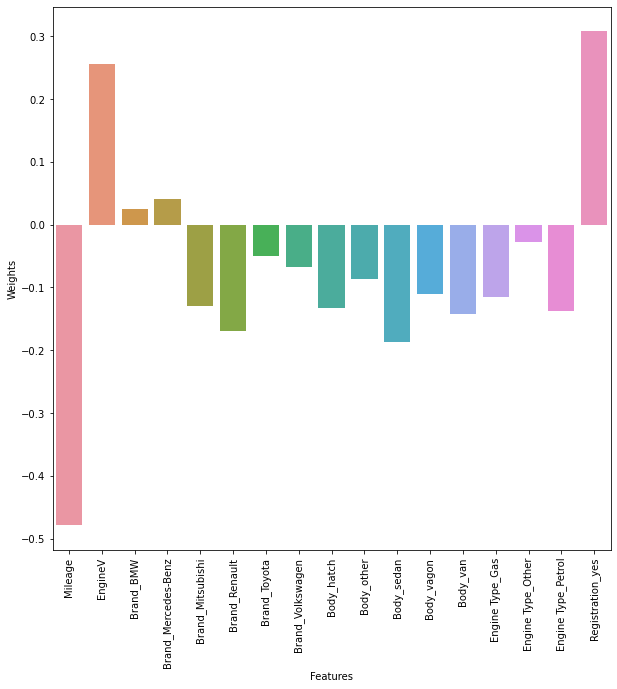

In [159]:
plt.figure(figsize = (10,10))
sns.barplot(data  = reg_summary, x = 'Features', y = 'Weights')


#sns.countplot(x= 'Make',data = data,order=data['Make'].value_counts().index)
plt.xticks(rotation=90)

In [151]:
reg_summary

,Features,Weights
0,Mileage,-0.48
1,EngineV,0.26
2,Brand_BMW,0.02
3,Brand_Mercedes-Benz,0.04
4,Brand_Mitsubishi,-0.13
5,Brand_Renault,-0.17
6,Brand_Toyota,-0.05
7,Brand_Volkswagen,-0.07
8,Body_hatch,-0.13
9,Body_other,-0.09


Object `regression` not found.
